**<h1>CSP :<h1>**

# **1_Course Scheduling**

You are in charge of scheduling for computer science classes that meet Mondays, Wednesdays and Fridays. There
are 5 classes that meet on these days and 3 professors who will be teaching these classes. You are constrained
by the fact that each professor can only teach one class at a time.

The classes are:
1. Class 1 - Intro to Programming: meets from 8:00-9:00am
2. Class 2 - Intro to Artificial Intelligence: meets from 8:30-9:30am
3. Class 3 - Natural Language Processing: meets from 9:00-10:00am
4. Class 4 - Computer Vision: meets from 9:00-10:00am
5. Class 5 - Machine Learning: meets from 10:30-11:30am

The professors are:
1. Professor A, who is qualified to teach Classes 1, 2, and 5.
2. Professor B, who is qualified to teach Classes 3, 4, and 5.
3. Professor C, who is qualified to teach Classes 1, 3, and 4.



**1.1**
Formulate this problem as a CSP problem in which there is one variable per class, stating the domains,
and constraints. Constraints should be specified formally and precisely, but may be implicit rather than
explicit.

**Answer**

Variables Domains (or unary constraints) : 
C1 {A, C}
C2 {A}
C3 {B, C}
C4 {B, C}
C5 {A, B}

Binary Constraints : 
C1 6= C2
C2 6= C3
C2 6= C4
C3 6= C4

**2.2** 
Draw the constraint graph associated with your CSP.

**Answer**



**1.3**
Your CSP should look nearly tree-structured. Briefly explain (one sentence or less) why we might prefer
to solve tree-structured CSPs

**Answer**

we can solve them in polynomial time. If a graph is tree structured (i.e. has no loops),
then the CSP can be solved in O(nd2
) time as compared to general CSPs, where worst-case time is O(d
n).
For tree-structured CSPs you can choose an ordering such that every node’s parent precedes it in the
ordering. Then after enforcing arc consistency you can greedily assign the nodes in order, starting from
the root, and will find a consistent assignment without backtracking.

# **2_Trapped Pacman**

Pacman is trapped! He is surrounded by mysterious corridors, each of which leads to either a pit (P), a ghost
(G), or an exit (E). In order to escape, he needs to figure out which corridors, if any, lead to an exit and freedom,
rather than the certain doom of a pit or a ghost.

The one sign of what lies behind the corridors is the wind: a pit produces a strong breeze (S) and an exit
produces a weak breeze (W), while a ghost doesn’t produce any breeze at all. Unfortunately, Pacman cannot
measure the strength of the breeze at a specific corridor. Instead, he can stand between two adjacent corridors
and feel the max of the two breezes. For example, if he stands between a pit and an exit he will sense a strong
(S) breeze, while if he stands between an exit and a ghost, he will sense a weak (W) breeze. The measurements
for all intersections are shown in the figure below.

Also, while the total number of exits might be zero, one, or more, Pacman knows that two neighboring squares
will not both be exits

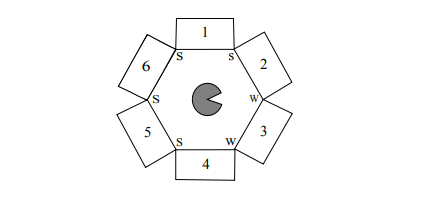

Pacman models this problem using variables Xi for each corridor i and domains P, G, and E.

**2.1**
State the binary and/or unary constraints for this CSP (either implicitly or explicitly).

**Answer**

Binary:
X1 = P or X2 = P, X2 = E or X3 = E,
X3 = E or X4 = E, X4 = P or X5 = P,
X5 = P or X6 = P, X1 = P or X6 = P,
∀i, j s.t. Adj(i, j) ¬(Xi = E and Xj = E)

Unary:
¬(X2 6= P),
¬(X3 6= P),
¬(X4 6= P)

**2.2** Cross out the values from the domains of the variables that will be deleted in enforcing arc consistency.

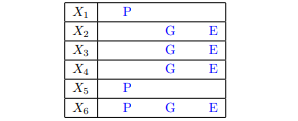

**2.3** According to MRV, which variable or variables could the solver assign first?

**Answer**

X1 or X5 (tie breaking)

**2.4** Assume that Pacman knows that X6 = G. List all the solutions of this CSP or write none if no solutions
exist.

**Answer**

(P,E,G,E,P,G)
(P,G,E,G,P,G)

**2.5** The CSP described above has a circular structure with 6 variables. Now consider a CSP forming a circular
structure that has n variables (n > 2), as shown below. Also assume that the domain of each variable has
cardinality d. Explain precisely how to solve this general class of circle-structured CSPs efficiently (i.e. in
time linear in the number of variables), using methods covered in class. Your answer should be at most
two sentences.

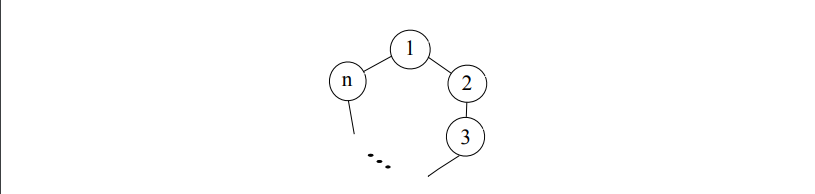

**Answer**

We fix Xj for some j and assign it a value from its domain (i.e. use cutset conditioning on one variable).
The rest of the CSP now forms a tree structure, which can be efficiently solved without backtracking by
enforcing arc consistency. We try all possible values for our selected variable Xj until we find a solution.

**2.6** If standard backtracking search were run on a circle-structured graph, enforcing arc consistency at every
step, what, if anything, can be said about the worst-case backtracking behavior (e.g. number of times the
search could backtrack)?


**Answer**

A tree structured CSP can be solved without any backtracking. Thus, the above circle-structured CSP
can be solved after backtracking at most d times, since we might have to try up to d values for Xj before
finding a solution

# **CSP implementation**
Here is an instance of the CSP class implementation.
This class describes finite-domain Constraint Satisfaction Problems.
    A CSP is specified by the following three inputs:
        vars        A list of variables; each is atomic (e.g. int or string).
        domains     A dict of {var:[possible_value, ...]} entries.
        neighbors   A dict of {var:[var,...]} that for each variable lists
                    the other variables that participate in constraints.
        constraints A function f(A, a, B, b) that returns true if neighbors
                    A, B satisfy the constraint when they have values A=a, B=b
    In the textbook and in most mathematical definitions, the
    constraints are specified as explicit pairs of allowable values,
    but the formulation here is easier to express and more compact for
    most cases. (For example, the n-Queens problem can be represented
    in O(n) space using this notation, instead of O(N^4) for the
    explicit representation.) In terms of describing the CSP as a
    problem, that's all there is.

    However, the class also supports data structures and methods that help you
    solve CSPs by calling a search function on the CSP.  Methods and slots are
    as follows, where the argument 'a' represents an assignment, which is a
    dict of {var:val} entries:
        assign(var, val, a)     Assign a[var] = val; do other bookkeeping
        unassign(var, a)        Do del a[var], plus other bookkeeping
        nconflicts(var, val, a) Return the number of other variables that
                                conflict with var=val
        curr_domains[var]       Slot: remaining consistent values for var
                                Used by constraint propagation routines.
    The following methods are used only by graph_search and tree_search:
        succ()                  Return a list of (action, state) pairs
        goal_test(a)            Return true if all constraints satisfied
    The following are just for debugging purposes:
        nassigns                Slot: tracks the number of assignments made
        display(a)              Print a human-readable representation

In [ ]:
from __future__ import generators
from utils import *
import search
import types

class CSP(search.Problem):

    def __init__(self, vars, domains, neighbors, constraints):
        "Construct a CSP problem. If vars is empty, it becomes domains.keys()."
        vars = vars or domains.keys()
        update(self, vars=vars, domains=domains,
               neighbors=neighbors, constraints=constraints,
               initial={}, curr_domains=None, pruned=None, nassigns=0)

    def assign(self, var, val, assignment):
        """Add {var: val} to assignment; Discard the old value if any.
        Do bookkeeping for curr_domains and nassigns."""
        self.nassigns += 1
        assignment[var] = val
        if self.curr_domains:
            if self.fc:
                self.forward_check(var, val, assignment)
            if self.mac:
                AC3(self, [(Xk, var) for Xk in self.neighbors[var]])

    def unassign(self, var, assignment):
        """Remove {var: val} from assignment; that is backtrack.
        DO NOT call this if you are changing a variable to a new value;
        just call assign for that."""
        if var in assignment:
            # Reset the curr_domain to be the full original domain
            if self.curr_domains:
                self.curr_domains[var] = self.domains[var][:]
            del assignment[var]

    def nconflicts(self, var, val, assignment):
        "Return the number of conflicts var=val has with other variables."
        # Subclasses may implement this more efficiently
        def conflict(var2):
            val2 = assignment.get(var2, None)
            return val2 != None and not self.constraints(var, val, var2, val2)
        return count_if(conflict, self.neighbors[var])

    def forward_check(self, var, val, assignment):
        "Do forward checking (current domain reduction) for this assignment."
        if self.curr_domains:
            # Restore prunings from previous value of var
            for (B, b) in self.pruned[var]:
                self.curr_domains[B].append(b)
            self.pruned[var] = []
            # Prune any other B=b assignement that conflict with var=val
            for B in self.neighbors[var]:
                if B not in assignment:
                    for b in self.curr_domains[B][:]:
                        if not self.constraints(var, val, B, b):
                            self.curr_domains[B].remove(b)
                            self.pruned[var].append((B, b))

    def display(self, assignment):
        "Show a human-readable representation of the CSP."
        # Subclasses can print in a prettier way, or display with a GUI
        print 'CSP:', self, 'with assignment:', assignment

    ## These methods are for the tree and graph search interface:

    def succ(self, assignment):
        "Return a list of (action, state) pairs."
        if len(assignment) == len(self.vars):
            return []
        else:
            var = find_if(lambda v: v not in assignment, self.vars)
            result = []
            for val in self.domains[var]:
                if self.nconflicts(self, var, val, assignment) == 0:
                    a = assignment.copy; a[var] = val
                    result.append(((var, val), a))
            return result

    def goal_test(self, assignment):
        "The goal is to assign all vars, with all constraints satisfied."
        return (len(assignment) == len(self.vars) and
                every(lambda var: self.nconflicts(var, assignment[var],
                                                  assignment) == 0,
                      self.vars))

    ## This is for min_conflicts search

    def conflicted_vars(self, current):
        "Return a list of variables in current assignment that are in conflict"
        return [var for var in self.vars
                if self.nconflicts(var, current[var], current) > 0]

SyntaxError: ignored

Here we have a soloution for n queens problem using the above class.

We first Make a CSP for the nQueens problem for search with min_conflicts.
    Suitable for large n, it uses only data structures of size O(n).
    we want to place queens one per column, from left to right.
    That means position (x, y) represents (var, val) in the CSP.
    The main structures are three arrays to count queens that could conflict:
        rows[i]      Number of queens in the ith row (i.e val == i)
        downs[i]     Number of queens in the \ diagonal
                     such that their (x, y) coordinates sum to i
        ups[i]       Number of queens in the / diagonal
                     such that their (x, y) coordinates have x-y+n-1 = i
    We increment/decrement these counts each time a queen is placed/moved from
    a row/diagonal. So moving is O(1), as is nconflicts.  But choosing
    a variable, and a best value for the variable, are each O(n).
    If you want, you can keep track of conflicted vars, then variable
    selection will also be O(1).

In [ ]:
def queen_constraint(A, a, B, b):
    """Constraint is satisfied (true) if A, B are really the same variable,
    or if they are not in the same row, down diagonal, or up diagonal."""
    return A == B or (a != b and A + a != B + b and A - a != B - b)

class NQueensCSP(CSP):
    """
    >>> len(backtracking_search(NQueensCSP(8)))
    8
    >>> len(min_conflicts(NQueensCSP(8)))
    8
    """
    def __init__(self, n):
        """Initialize data structures for n Queens."""
        CSP.__init__(self, range(n), UniversalDict(range(n)),
                     UniversalDict(range(n)), queen_constraint)
        update(self, rows=[0]*n, ups=[0]*(2*n - 1), downs=[0]*(2*n - 1))
    

The number of conflicts, as recorded with each assignment.
        Count conflicts in row and in up, down diagonals. If there
        is a queen there, it can't conflict with itself, so subtract 3.

In [ ]:
def nconflicts(self, var, val, assignment):
        n = len(self.vars)
        c = self.rows[val] + self.downs[var+val] + self.ups[var-val+n-1]
        if assignment.get(var, None) == val:
            c -= 3
        return c

Assign var, and keep track of conflicts.

In [ ]:
def assign(self, var, val, assignment):
        oldval = assignment.get(var, None)
        if val != oldval:
            if oldval is not None: # Remove old val if there was one
                self.record_conflict(assignment, var, oldval, -1)
            self.record_conflict(assignment, var, val, +1)
            CSP.assign(self, var, val, assignment)

Remove var from assignment (if it is there) and track conflicts

In [ ]:
def unassign(self, var, assignment):
        if var in assignment:
            self.record_conflict(assignment, var, assignment[var], -1)
        CSP.unassign(self, var, assignment)

Record conflicts caused by addition or deletion of a Queen.

In [ ]:
def record_conflict(self, assignment, var, val, delta):
        n = len(self.vars)
        self.rows[val] += delta
        self.downs[var + val] += delta
        self.ups[var - val + n - 1] += delta

this function Prints the queens and the conflicts values (for debugging)

In [ ]:
def display(self, assignment):
        
        n = len(self.vars)
        for val in range(n):
            for var in range(n):
                if assignment.get(var,'') == val: ch ='Q'
                elif (var+val) % 2 == 0: ch = '.'
                else: ch = '-'
                print ch,
            print '    ',
            for var in range(n):
                if assignment.get(var,'') == val: ch ='*'
                else: ch = ' '
                print str(self.nconflicts(var, val, assignment))+ch,
            print

**<h1> Adverserial :<h1>**

#**1_Minimax (nearly minimax)**
In this problem, you will consider the non zero-sum generalization in which the sum of the two players’ utilities are not necessarily zero. Because player A’s utility no longer determines player B’s utility exactly, the leaf utilities are written as pairs (UA,UB), with the first and second component indicating the utility of that leaf to A and B respectively. In this generalized setting, A seeks to maximize UA, the first component, while B seeks to maximize UB, the second component.


**1.1** 


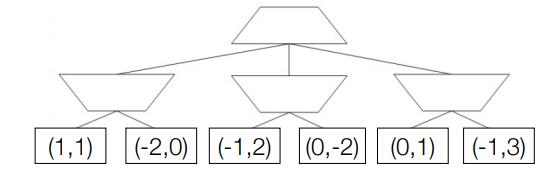

Propagate the terminal utility pairs up the tree using the appropriate generalization of the minimax algorithm on this game tree. Fill in the values (as pairs) at each of the internal node. Assume that each player maximizes their own utility.


**Answer**

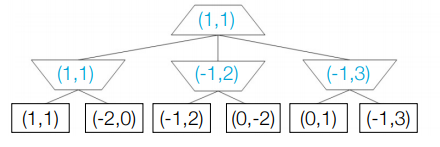

**1.2** Briefly explain why no alpha-beta style pruning is possible in the general non-zero sum case.

Hint: think first about the case where UA(s) = UB(s) for all nodes.


**Answer**

The values that the first and second player are trying to maximize are independent, so we no longer have situations where we know that one player will never let the other player down a particular branch of the game tree.

For instance, in the case where UA = UB, the problem reduces to searching for the max-valued leaf, which could appear anywhere in the tree.


**1.3** For minimax, we know that the value $v$ computed at the root (say for player A = MAX) is a worst-case
value. This means that if the opponent MIN doesn’t act optimally, the actual outcome $v'$
for MAX can only be better, never worse than $v$.

In the general non-zero sum setup, can we say that the value $U_A$ computed at the root for player A is also a worst-case value in this sense, or can A’s outcome be worse than the computed $U_A$ if B plays sub-optimally? 

**Answer**

A’s outcome can be worse than the computed $U_A$. For instance, in the example game, if B chooses (−2, 0)
over (1, 1), then A’s outcome will decrease from 1 to -1.

**1.4** Now consider the nearly zero sum case, in which $|U_A(s) + U_B(s)| ≤ \epsilon $ at all terminal nodes s for some $\epsilon$
which is known in advance. For example, the previous game tree is nearly zero sum for $\epsilon$ = 2.

In the nearly zero sum case, pruning is possible. Draw an X in each node in this game tree which could be
pruned with the appropriate generalization of alpha-beta pruning. Assume that the exploration is being
done in the standard left to right depth-first order and the value of $\epsilon$ is known to be 2.


**Answer**

We can prune the node (0, −2) and if we allow pruning on equality then we can also prune (−1, 3). 

# **2_Expectimax**

**2.1** give an example  in which the root node has a larger value if expectimax search is used than if
minimax is used, or argue why it is not possible.


**Answer**

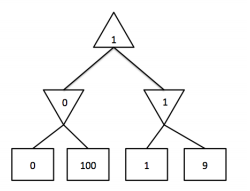


We can see here that the above game tree has a root value of 1 for the minimax strategy. If we instead switch to expectimax and replace the min nodes with chance nodes, chance nodes take 50 and 10 and the root of the tree takes on a value of 50 and the optimal action changes for MAX.

**2.2** 
is there example for reverse problem  in which the root node has a larger value if minimax search is used than if expectimax is used, or argue why it is not possible.


**Answer**

Optimal play for MIN, by definition, means the best moves for MIN to obtain the lowest value possible. Random play includes moves that are not optimal. Assuming there are no ties (no two leaves have the same value), expectimax will always average in suboptimal moves. Averaging a suboptimal move (for MIN) against an optimal move (for MIN) will always increase the expected outcome.
With this in mind, we can see how there is no game tree where the value of the root for expectimax is lower than the value of the root for minimax. One is optimal play – the other is suboptimal play averaged with optimal play, which by definiton leads to a higher value for MIN.

**2.3** when is better to use minimax rather than expectimax? 

Under what assumptions it is better to use expectimax search rather than minimax
search?


**Answer**

if you expect your oppnent is playing optimal it is better to use minimax.

if the oppnent is playing randomly expectimax will optimize for the maximum expected value.

**2.4**. Imagine that player 1 wishes to act optimally (rationally), and player 1 knows that player 2 also intends to act optimally. However, player 1 also knows that player 2 (mistakenly) believes that player 1 is moving uniformly at random rather than optimally. Explain how player 1 should use this knowledge to select a move.

**Answer**

Use two games trees:

Game tree 1: max is replaced by a chance node. Solve this tree to find the policy of MIN.

Game tree 2: the original tree, but MIN doesn’t have any choices now, instead is constrained to follow the policy found from Game Tree 1.

#**Minimax with alpha beta pruning implenation**
We have python code for famous game tic tac toe with Minimax algorithm.


In [ ]:
import numpy as np
import sys
from copy import copy
rows=3
cols=3

board=np.zeros((rows,cols))
# 0 ->blank
# 1 --> 'x'
# 2-> 'o'
inf=9999999999
neg_inf=-9999999999
def printBoard():
    for i in range(0,rows):
        for j in range(0,cols):
            if board[i,j]==0:
                sys.stdout.write(' _ ')

            elif board[i,j]==1:
                sys.stdout.write(' X ')
            else:
                sys.stdout.write(' O ')
         
        print ('')


#for tic Tac Toe the heuris function will be evaluating the board position for each of the winning positions
heuristicTable=np.zeros((rows+1,cols+1))
numberOfWinningPositions=rows+cols+2 
for index in range(0,rows+1):
    heuristicTable[index,0]=10**index
    heuristicTable[0,index]=-10**index

winningArray=np.array([[0,1,2],[3,4,5],[6,7,8],[0,3,6],[1,4,7],[2,5,8],[0,4,8],[2,4,6]])
#print 'the heuristicTable is ',heuristicTable
#print 'numberOfWinningPositions is ',numberOfWinningPositions
def utilityOfState(state):
    
    
    stateCopy=copy(state.ravel())
    heuristic=0
    for i in range(0,numberOfWinningPositions):
        maxp=0
        minp=0
        for j in range(0, rows):
            if stateCopy[winningArray[i,j]]==2:
                maxp+=1
            elif stateCopy[winningArray[i,j]]==1:
                minp+=1
        
        #each iteration of the inner loop evalutes the objective function for each of the winning positions
        heuristic+=heuristicTable[maxp][minp]
    #print 'heuristic for state ',state,' is ',heuristic
    return heuristic

def minimax(state,alpha,beta,maximizing,depth,maxp,minp):
    
    if depth==0:
        return utilityOfState(state),state
    
    rowsLeft,columnsLeft=np.where(state==0)
    returnState=copy(state)
    if rowsLeft.shape[0]==0:
        return utilityOfState(state),returnState
        
    if maximizing==True:
        utility=neg_inf
        for i in range(0,rowsLeft.shape[0]):
            nextState=copy(state)
            nextState[rowsLeft[i],columnsLeft[i]]=maxp
            #print 'in max currently the Nextstate is ',nextState,'\n\n'
            Nutility,Nstate=minimax(nextState,alpha,beta,False,depth-1,maxp,minp)
            if Nutility > utility:
                utility=Nutility
                returnState=copy(nextState)
            if utility>alpha:
                alpha=utility
            if alpha >=beta :
                #print 'pruned'
                break;
        
        #print 'for max the best move is with utility ',utility,' n state ',returnState
        return utility,returnState

    else:
        utility=inf
        for i in range(0,rowsLeft.shape[0]):
            nextState=copy(state)
            nextState[rowsLeft[i],columnsLeft[i]]=minp
            #print 'in min currently the Nextstate is ',nextState,'\n\n'
            Nutility,Nstate=minimax(nextState,alpha,beta,True,depth-1,maxp,minp)
            if Nutility < utility:
                utility=Nutility
                returnState=copy(nextState)
            if utility< beta:
                beta=utility
            if alpha >=beta :
                #print 'pruned'
                break;
        return utility,returnState
        
def checkGameOver(state):
    stateCopy=copy(state)
    value=utilityOfState(stateCopy)
    if value >=1000:
        return 1
    return -1
    
    
def main():
    num=int(input('enter player num (1st or 2nd) '))
    value=0
    global board
    for turn in range(0,rows*cols):
        if (turn+num)%2==1: #make the player go first, and make the user player as 'X'
            r,c=[int(x) for x in input('Enter your move ').split(' ')]
            
            board[r-1,c-1]=1
            printBoard()
            value=checkGameOver(board)
            if value==1:
                print ('U win.Game Over')
                return
            print ('\n')
        else: #its the computer's turn make the PC always put a circle'
            #right now we know the state if the board was filled by the other player 
            state=copy(board)
            value,nextState=minimax(state,neg_inf,inf,True,2,2,1)
            board=copy(nextState)
            printBoard()
            print ('\n')
            value=checkGameOver(board)
            if value==1:
                print ('PC wins.Game Over')
                return
        
    print ('Its a draw')
main()

enter player num (1st or 2nd) 1
Enter your move 1 1
 X  _  _ 
 _  _  _ 
 _  _  _ 


 X  _  _ 
 _  O  _ 
 _  _  _ 


Enter your move 1 2
 X  X  _ 
 _  O  _ 
 _  _  _ 


 X  X  O 
 _  O  _ 
 _  _  _ 


Enter your move 2 1
 X  X  O 
 X  O  _ 
 _  _  _ 


 X  X  O 
 X  O  _ 
 O  _  _ 


PC wins.Game Over


http://aima.cs.berkeley.edu/python/csp.html

http://ai.berkeley.edu/section_handouts.html

https://github.com/deerishi/Tic-Tac-Toe-Using-Alpha-Beta-Minimax-Search/blob/master/tictac.py

